#  3  DATA PREPARATION FOR INDEPTH ANALYSES

***

##  3.1    Importing foundational libraries


### Access to the system's parameters (https://docs.python.org/3/library/sys.html)

In [1]:
import sys 
print("Python version: {}". format(sys.version))
print('-'*100)

Python version: 3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]
----------------------------------------------------------------------------------------------------



### Pandas is a collection of functions which comes in form of dataframes with SQL-like features for data processing and analysis

In [2]:
import pandas as pd 
print("pandas version: {}". format(pd.__version__))

pandas version: 0.20.1



### Matplotlib gives us a collection of functions for scientific and publication-ready visualization

In [3]:
import matplotlib 
print("matplotlib version: {}". format(matplotlib.__version__))

matplotlib version: 2.0.2



### For mathematical and scientific computing a good starting package will be NumPy

In [4]:
import numpy as np 
print("NumPy version: {}". format(np.__version__))

NumPy version: 1.14.2



### SciPy also has a pretty good collection of functions for scientific computing and advanced mathematics

In [5]:
import scipy as sp 
print("SciPy version: {}". format(sp.__version__)) 

SciPy version: 1.2.1



### Sklearn provides a range of dazzling machine learning algorithms which is quite effective for data analyses

In [6]:
import sklearn 
print("scikit-learn version: {}". format(sklearn.__version__))

scikit-learn version: 0.18.2



### Let me add IPython to it. Or perhaps, import it for its display funtion in order to beautify the pandas dataframes in the jupyter notebook

In [7]:
import IPython
from IPython import display 
print("IPython version: {}". format(IPython.__version__)) 

IPython version: 5.3.0



### Who doesn't factor miscellaneous functions? Two most import ones: Time and randomization. 
>### Let me also ignore warnings such as deprecation alerts, etc. for a smooth guide.

In [8]:
import random
import time
import warnings
warnings.filterwarnings('ignore')
print('-'*100)

----------------------------------------------------------------------------------------------------


***
##  3.2    Importing the data modeling libraries

### Importing models / algorithms for the analyses

In [9]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

### Importing some model helpers from the libraries in section 3.1

In [10]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

### Loading other functions for a good visualization of the entire modeling process and analysis

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

***
##  3.3 Knowing the Data We Will Deal With

### In this section, we perform a first initial attempt to know what the data is made up of. Fortunately, ANZ and DataCastle gave an elaboratate meaning of what to expect.

***
### INPUT VARIABLES
***

### Bank client data:
>#### 1. Age (numeric)
>#### 2. Job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
>#### 3. Marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
>#### 4. Education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
>#### 5. Default: has credit in default? (categorical: 'no','yes','unknown')
>#### 6. Housing: has home loan? (categorical: 'no','yes','unknown')
>#### 7. Loan: has personal loan? (categorical: 'no','yes','unknown')
 
### Related with the last contact of the current campaign:
>#### 8. Contact: contact communication type (categorical: 'cellular','telephone') 
>#### 9. Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
>#### 10. Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
>#### 11. Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

###  Other attributes:
>#### 12. Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
>#### 13. Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
>#### 14. Previous: number of contacts performed before this campaign and for this client (numeric)
>#### 15. Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

###  Social and economic context attributes：
>#### 16. Emp.var.rate: employment variation rate. quarterly indicator (numeric)
>#### 17. Cons.price.idx: consumer price index. monthly indicator (numeric) 
>#### 18. Cons.conf.idx: consumer confidence index. monthly indicator (numeric) 
>#### 19. Euribor3m: euribor 3 month rate. daily indicator (numeric)
>#### 20. Nr.employed: number of employees. quarterly indicator (numeric)

### OUTPUT VARIABLE (desired target):
>#### 21. y - has the client subscribed a term deposit? (binary: 'yes','no')

### Despite this elaborate information, we at least want to confirm the data content is what we expect and that's what we'll be working with it through this work


***
### Declaring path to the file:
>#### You should have about 37069 rows with 21 columns

In [12]:
location ="C:/Users/King/Documents/GitHub/Customer-Response-Modeling/"
file = "DataCastleData.csv"

df = pd.read_csv(location + file)
actual_df = df.copy()

# Viewing the shape of our dataset
df.shape

print("We have " + str(df.shape[0]) + " rows with " + str(df.shape[1]) +" columns.")

We have 37069 rows with 21 columns.


# ***
##  3.4    A Statistical Overview of the Data
***
>### We have 37069 rows (entries) with 21 columns which include the target field (columns)
>### Let's have a peep of how it really looks like...

#### Viewing the first five rows (the head) of our dataset

In [13]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,26,admin.,single,university.degree,no,no,no,telephone,aug,mon,...,1,3,1,success,-1.7,94.027,-38.3,0.904,4991.6,yes
1,35,blue-collar,married,unknown,no,yes,no,cellular,may,thu,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,yes
2,42,self-employed,married,university.degree,no,yes,no,cellular,apr,tue,...,1,999,1,failure,-1.8,93.075,-47.1,1.423,5099.1,yes
3,46,housemaid,married,high.school,no,yes,no,cellular,aug,fri,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.881,5076.2,yes
4,41,services,single,high.school,no,yes,yes,cellular,apr,wed,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.415,5099.1,yes


#### Viewing the last five rows (the tail) of our dataset

In [14]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37064,37,unemployed,married,professional.course,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
37065,59,admin.,married,high.school,no,yes,no,cellular,apr,wed,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.445,5099.1,no
37066,48,blue-collar,married,professional.course,unknown,yes,no,cellular,aug,thu,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
37067,55,retired,married,high.school,no,yes,no,telephone,may,tue,...,5,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
37068,45,management,single,basic.9y,no,yes,no,telephone,jun,fri,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no


#### Exploring the data in a summarized way ...
>#### Getting descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [15]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.043783,258.374868,2.573552,962.543419,0.172570,0.082759,93.575098,-40.502147,3.622370,5167.150813
std,10.395798,260.203020,2.786845,186.740644,0.494031,1.571270,0.579297,4.630409,1.733892,72.168914
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Insights from the descriptive statistics

>#### Count(row number) is seen to be constant in all of the fields i.e. we have 37069 entries 
>#### Mean Age is aproximately 40 years old. (Minimum: 17 years old and Maximum: 98 years old) and together with the Standard Deviations of the fields etc.

### Knowing the concise summary of the DataFrame is necessary for arriving at plausible solutions precisely.
#### We use method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 21 columns):
age               37069 non-null int64
job               37069 non-null object
marital           37069 non-null object
education         37069 non-null object
default           37069 non-null object
housing           37069 non-null object
loan              37069 non-null object
contact           37069 non-null object
month             37069 non-null object
day_of_week       37069 non-null object
duration          37069 non-null int64
campaign          37069 non-null int64
pdays             37069 non-null int64
previous          37069 non-null int64
poutcome          37069 non-null object
emp.var.rate      37069 non-null float64
cons.price.idx    37069 non-null float64
cons.conf.idx     37069 non-null float64
euribor3m         37069 non-null float64
nr.employed       37069 non-null float64
y                 37069 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

#### Check to see if there are any missing values in our data set

In [17]:
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

### Fortunately, there are no missing values. If there were missing values I will have to fill them with the median, mean or mode. I tend to use the median but in this scenario there is no need to fill any missing values. This will definitely make our job easier!

### Nevertheless, it seems there is no mission value in any of the fields or columns but then, an insight reveals that the empty values were filled with "unknowns".
<br>

<i><font color=red size=4>Processing the data with "unknowns" might seem fine, but the semantic uniqueness and the pragmatic meaning might gear our learning models towards unrealistic results

For instance, unknown in the 'marital' column might be represented as a new marital status and classified as such. Meanwhile, these unknowns may have belonged to any of the definite options: single, married or divorced. 
</font>
</i>
### With this in mind, I carefully noted it down as we might want to handle them properly during the data imputation, in order not to flout data semantics and pragmatics in the modeling.

***
>### In accordance with the dataframe information we generated early on, memory is 5.9+ MB. In a corporate world, we would care much about memory optimization. Below, we would seek to optimize the memory usage to an extent.

#### Verifying the memory usage of each column in bytes 

In [18]:
print(df.memory_usage())
print('-'*100)

memory1 = df.memory_usage(index=True).sum()
print(memory1/ 1024**2," MB - Memory Allocation")

Index                 80
age               296552
job               296552
marital           296552
education         296552
default           296552
housing           296552
loan              296552
contact           296552
month             296552
day_of_week       296552
duration          296552
campaign          296552
pdays             296552
previous          296552
poutcome          296552
emp.var.rate      296552
cons.price.idx    296552
cons.conf.idx     296552
euribor3m         296552
nr.employed       296552
y                 296552
dtype: int64
----------------------------------------------------------------------------------------------------
5.939170837402344  MB - Memory Allocation


### From the results above, I realized that the default memory allocation has been given and memory is about 5.93917 MB. Nevertheless, field like 'integers', 'floats' etc could have a reduced memory allocation if possible. (A background in Computer Engineering enables me to add this minor techniques but in relation to big data, this approach would really help).

#### Hence, I seek to reduce memory allocation wherever possible by changing the datatypes to a optimized preference

In [19]:
def alter_datatype(df):
    int_fields = list(df.select_dtypes(include=['int']).columns)
    for field in int_fields:
        if ((np.max(df[field]) <= 127) and(np.min(df[field] >= -128))):
            df[field] = df[col].astype(np.int8)
        elif ((np.max(df[field]) <= 32767) and(np.min(df[field] >= -32768))):
            df[field] = df[field].astype(np.int16)
        elif ((np.max(df[field]) <= 2147483647) and(np.min(df[field] >= -2147483648))):
            df[field] = df[field].astype(np.int32)
        else:
            df[field] = df[field].astype(np.int64)

# Calling the alteration function we above
alter_datatype(df)

def alter_datatype_float(df):
    float_fields = list(df.select_dtypes(include=['float']).columns)
    for field in float_fields:
        df[field] = df[field].astype(np.float32)

# Calling the alteration function we above
alter_datatype_float(df)

# Rechecking
print(df.memory_usage())

print('-'*100)
memory2 = df.memory_usage(index=True).sum()
print(memory2/ 1024**2," MB")

print('-'*100)

print("We just saved: ")
print((memory1-memory2)/ 1024**2," MB - Optimized Memory Allocation")

print('-'*100)
print(df.info())

Index                 80
age               296552
job               296552
marital           296552
education         296552
default           296552
housing           296552
loan              296552
contact           296552
month             296552
day_of_week       296552
duration          296552
campaign          296552
pdays             296552
previous          296552
poutcome          296552
emp.var.rate      148276
cons.price.idx    148276
cons.conf.idx     148276
euribor3m         148276
nr.employed       148276
y                 296552
dtype: int64
----------------------------------------------------------------------------------------------------
5.232135772705078  MB
----------------------------------------------------------------------------------------------------
We just saved: 
0.7070350646972656  MB - Optimized Memory Allocation
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Range

>### I have optimized the allocation of data in the storage. Some floating point were in 64-bit. There were pushed to 32-bits.That's good for the whole practicality of this work.

<i><font color=blue size=5>Now, the memory space is obtain 5.2+ MB after optimizing the allocation. That's great!</font></i>

***
### As highlighted early on, I have a number of fields that are non-numeric. Some algorithms find it difficult in computing some non-numeric variables so I will convert these variables into categorical variables

### I will also do some renaming of the fields so I can easily express myself. Nice!.

In [20]:
# Renaming certain columns for better readability
df = df.rename(columns={'day_of_week': 'dayOfWeek', 
                        'emp.var.rate': 'empVarRate',
                        'cons.price.idx': 'consPriceIdx',
                        'cons.conf.idx': 'consConfIdx',
                        'nr.employed': 'numEmployed'
                        })

df["job"] = df["job"].astype('category').cat.codes
df["marital"] = df["marital"].astype('category').cat.codes
df["education"] = df["education"].astype('category').cat.codes
df["housing"] = df["housing"].astype('category').cat.codes
df["loan"] = df["loan"].astype('category').cat.codes
df["contact"] = df["contact"].astype('category').cat.codes
df["default"] = df["default"].astype('category').cat.codes
df["month"] = df["month"].astype('category').cat.codes
df["dayOfWeek"] = df["dayOfWeek"].astype('category').cat.codes
df["poutcome"] = df["poutcome"].astype('category').cat.codes
df["y"] = df["y"].astype('category').cat.codes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 21 columns):
age             37069 non-null int64
job             37069 non-null int8
marital         37069 non-null int8
education       37069 non-null int8
default         37069 non-null int8
housing         37069 non-null int8
loan            37069 non-null int8
contact         37069 non-null int8
month           37069 non-null int8
dayOfWeek       37069 non-null int8
duration        37069 non-null int64
campaign        37069 non-null int64
pdays           37069 non-null int64
previous        37069 non-null int64
poutcome        37069 non-null int8
empVarRate      37069 non-null float32
consPriceIdx    37069 non-null float32
consConfIdx     37069 non-null float32
euribor3m       37069 non-null float32
numEmployed     37069 non-null float32
y               37069 non-null int8
dtypes: float32(5), int64(5), int8(11)
memory usage: 2.5 MB


### Awesome! By changing the objects to int8's, I have even optimized the memory further. 
<i><font color=blue size=5>The memory space is now 2.5 MB! That's a huge improvement from 5.9+ MB.</font></i>

### Lemme do check what's happening in the dataframe. Just viewing the top of the entries

In [21]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,dayOfWeek,...,campaign,pdays,previous,poutcome,empVarRate,consPriceIdx,consConfIdx,euribor3m,numEmployed,y
0,26,0,2,6,0,0,0,1,1,1,...,1,3,1,2,-1.7,94.027000,-38.299999,0.904,4991.600098,1
1,35,1,1,7,0,2,0,0,6,2,...,3,999,0,1,-1.8,92.892998,-46.200001,1.327,5099.100098,1
2,42,6,1,6,0,2,0,0,0,3,...,1,999,1,0,-1.8,93.074997,-47.099998,1.423,5099.100098,1
3,46,3,1,3,0,2,0,0,1,0,...,1,999,0,1,-2.9,92.200996,-31.400000,0.881,5076.200195,1
4,41,7,2,3,0,2,2,0,0,4,...,2,999,0,1,-1.8,93.074997,-47.099998,1.415,5099.100098,1


***
### Now, let's check the overview of the target data (field)

In [22]:
turnover_Summary = df.groupby('y')
turnover_Summary.mean()

,age,job,marital,education,default,housing,loan,contact,month,dayOfWeek,duration,campaign,pdays,previous,poutcome,empVarRate,consPriceIdx,consConfIdx,euribor3m,numEmployed
y,,,,,,,,,,,,,,,,,,,,
0,39.924973,3.691625,1.162574,3.698037,0.224049,1.069163,0.327519,0.390513,4.228455,1.998025,221.099611,2.640148,984.307676,0.131822,0.913456,0.250234,93.603607,-40.596561,3.812850,5176.290039
1,40.983417,3.942322,1.252103,4.094208,0.095169,1.100457,0.312665,0.171113,4.196828,2.067532,553.172795,2.046864,790.416967,0.494833,1.062245,-1.241745,93.349617,-39.755444,2.115928,5094.873535


### It can be observed that the duration mean of 'yes' (1) are far greater than 'no' (0).
>#### Lemme do some semantic analysis over here! 
> Unfortunately, the duration of the client is not known, until you make the call and after you end the conversation.  To create > a model that would aid the corporation in realizing potential attributes that person who signup possesses, 'duration' is surely not a factor. It is best to drop it.

#### Aside, 'duration', the mean of previous seem to also make an impact in the 'yes'. Nevetherless, this is barely anything to base the reality on. Therefore, we conduct a further analysis to mine deeper insights  on the data 

### We can start out and review the spread of each attribute by looking at box and whisker plots.

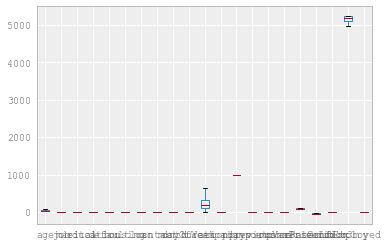

In [23]:
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'
df.boxplot()

***
### Let's have a look at the histogram distribution of the data
>### This would let us note interesting properties of the attribute distributions such as the possible normal distribution of attributes

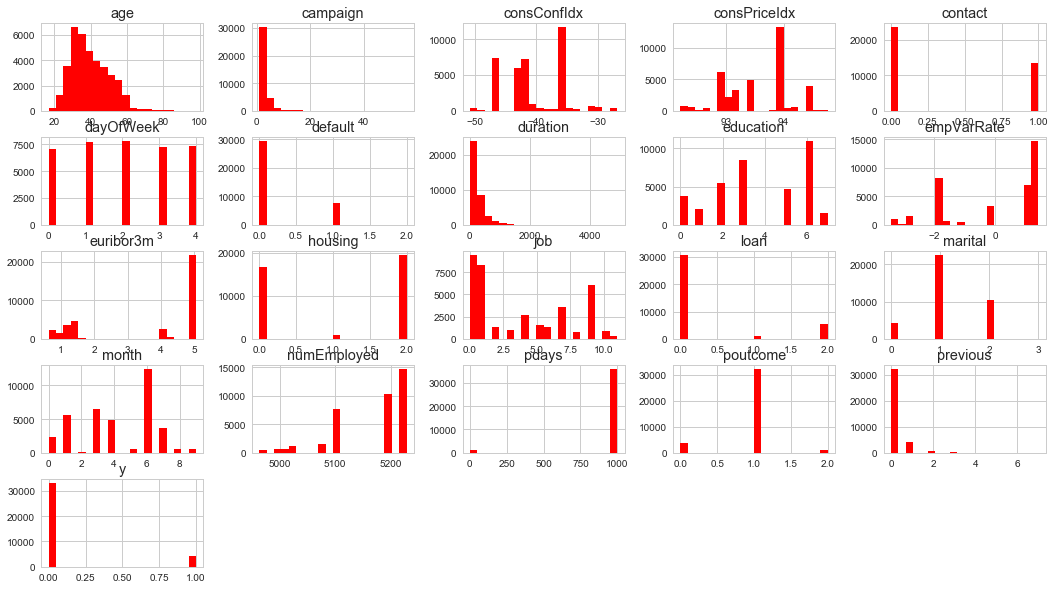

In [24]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(18,10), color='red')
plt.show()

***
### Next, an essential relationship to explore how each attribute is related to the target attribute. The first 20 is for the first class, and the last, is for the second class

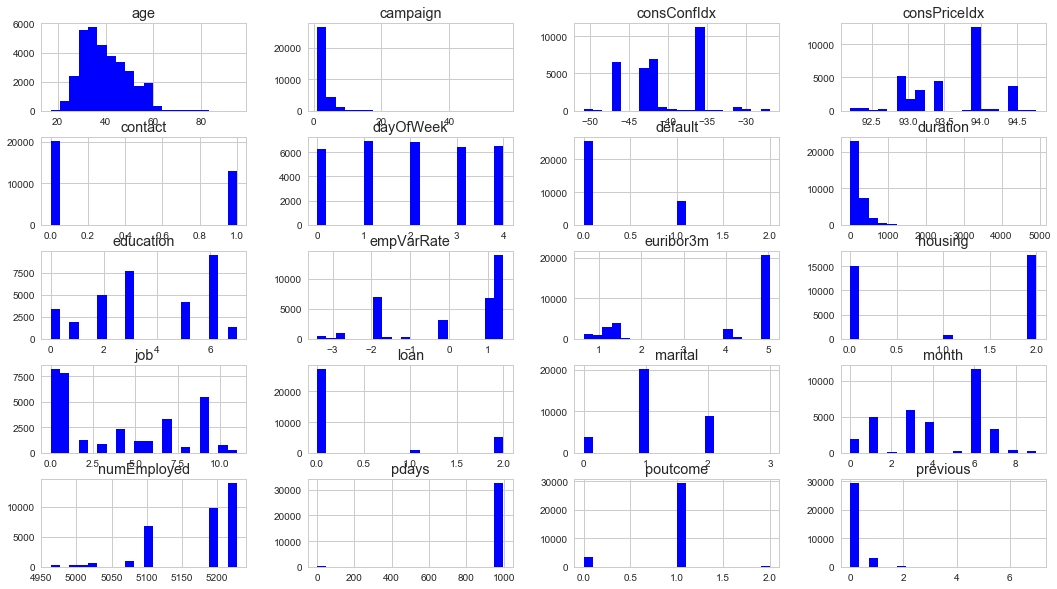

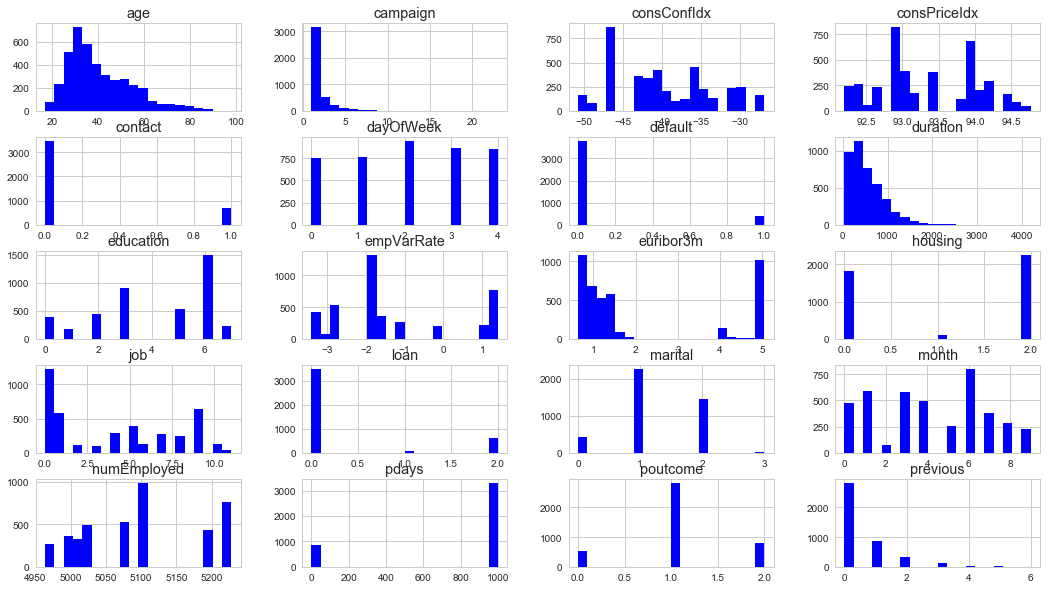

In [25]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').hist(bins=20, figsize=(18,10), color='blue')
plt.show()

***
### In order to clear assess each variable and the target class, let take our time to view their distributions

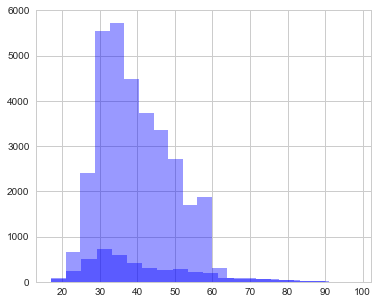

In [26]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').age.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Job vs Target

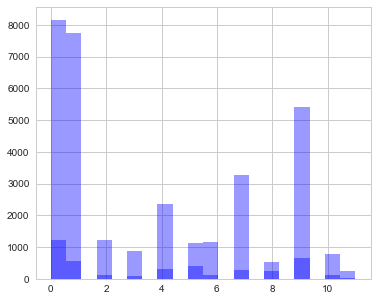

In [27]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').job.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Marital vs Target

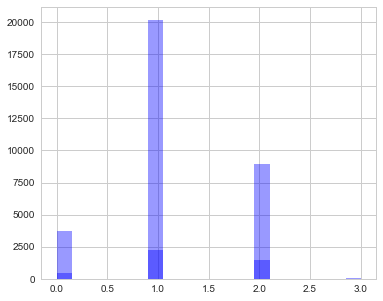

In [28]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').marital.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Education vs Target

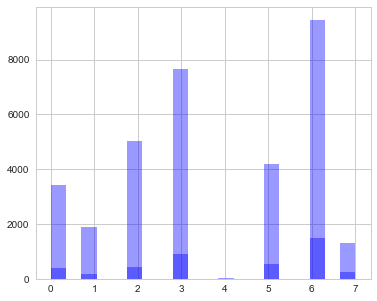

In [29]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').education.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Default vs Target

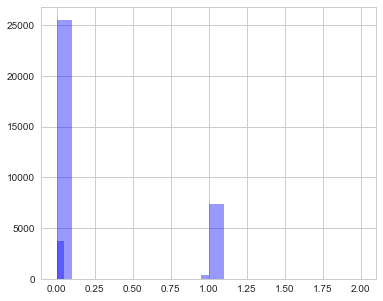

In [30]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').default.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Housing vs Target

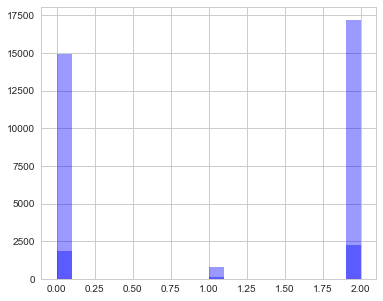

In [31]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').housing.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Loan vs Target

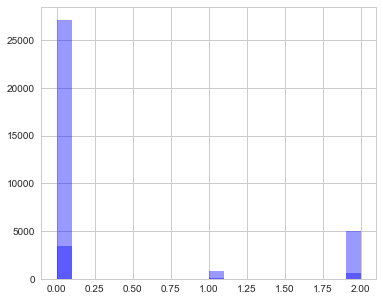

In [32]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').loan.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Contact vs Target

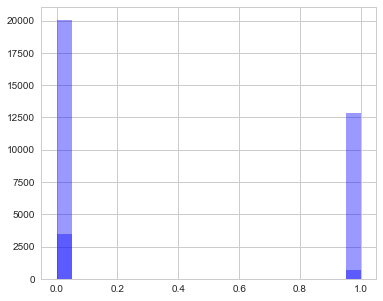

In [33]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').contact.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Month vs Target

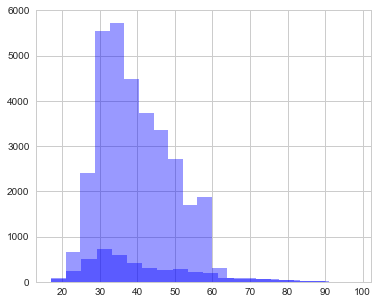

In [34]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').age.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### DayOfWeek vs Target

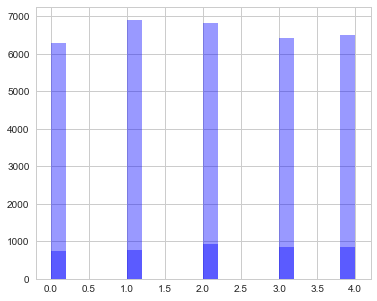

In [35]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').dayOfWeek.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Duration vs Target (Checking, but would be drop later)

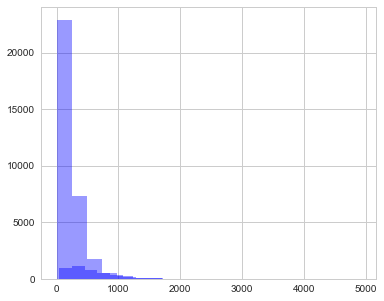

In [36]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').duration.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Campaign vs Target

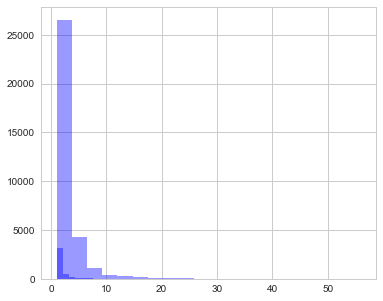

In [37]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').campaign.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Pdays vs Target (999 - no prior contact)

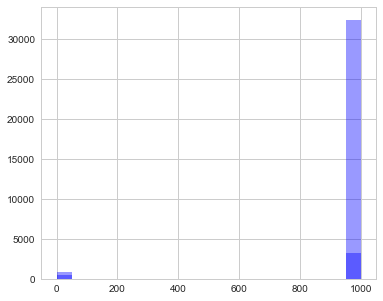

In [38]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').pdays.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Previous vs Target

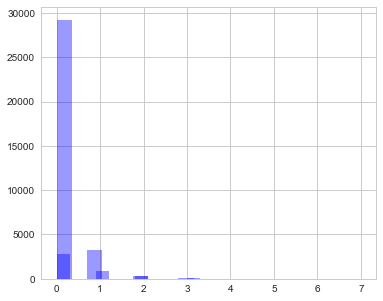

In [39]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').previous.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Poutcome vs Target

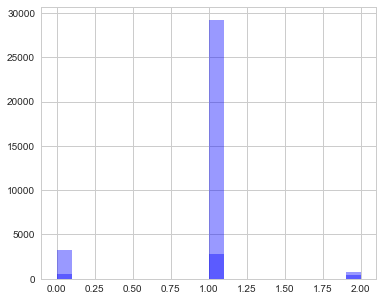

In [40]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').poutcome.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Emp.Var.Rate vs Target

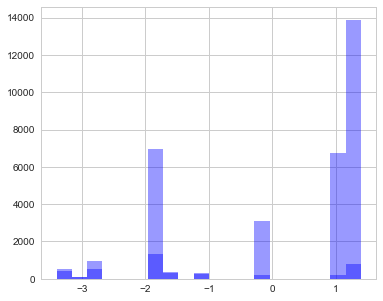

In [41]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').empVarRate.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Cons.Price.Idx vs Target

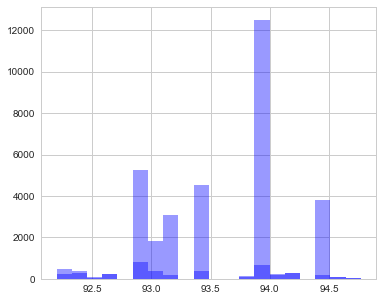

In [42]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').consPriceIdx.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Cons.Conf.Idx vs Target

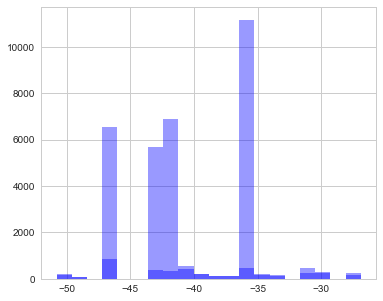

In [43]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').consConfIdx.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Euribor3m vs Target

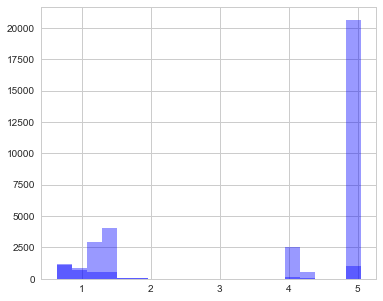

In [44]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').euribor3m.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### Nr.employed vs Target

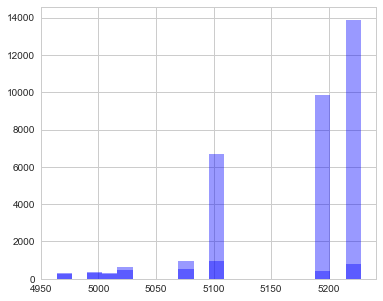

In [45]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.groupby('y').numEmployed.hist(bins=20, figsize=(6,5), color='blue', alpha=0.4)
plt.show()

### From the distributions above, showcasing the feature-target class relationship we now have a clearly value of how to treat our variables. We further conduct a deeper look to retrieve more information from the data.

### Since we aim to create a model, that could be of a better practical use to companies, insights from the above is simply not enough 

***
### A DIVE INTO POTENTIAL EFFECTS OF EACH DETERMINANT

### In this section, I will analyze the dependence or association of the statistical relationship, whether causal or not, among the determinant variables together with the target variable.
>### By using a decision tree classifier, it could give a further indication of rank of the features used for the prediction.

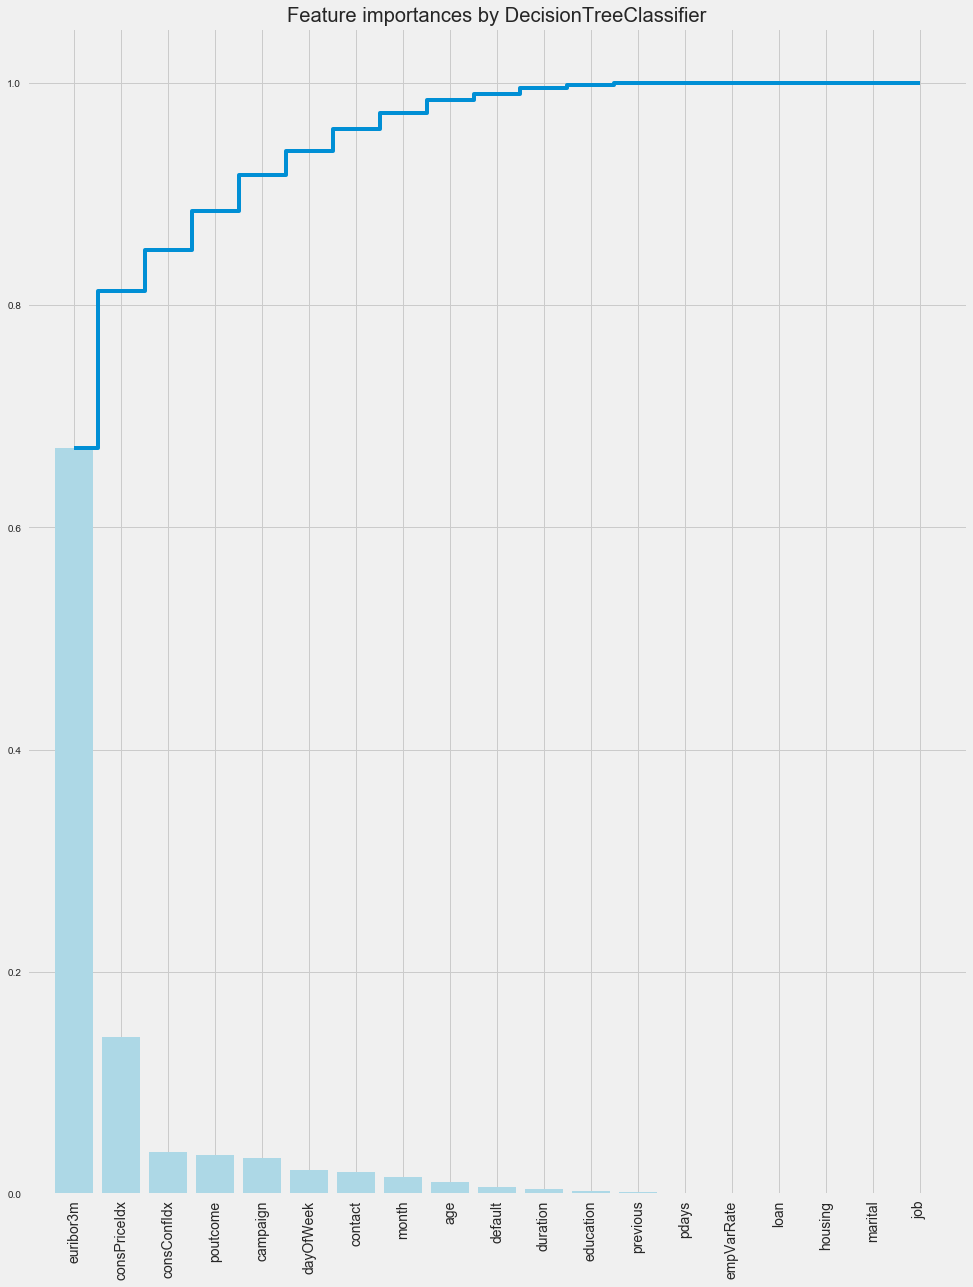

In [46]:
# from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)


# Create train and test splits
target_name = 'y'
X = df.drop(['y','duration'], axis=1)


y=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=123, stratify=y)
dtree = tree.DecisionTreeClassifier(
    max_depth=5,
    class_weight="balanced",
    min_weight_fraction_leaf=0.001
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['y'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(15,20))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

### One approach is simply not enough to determine causal variables in a corporate world.
>### Let's see the correlation in the data

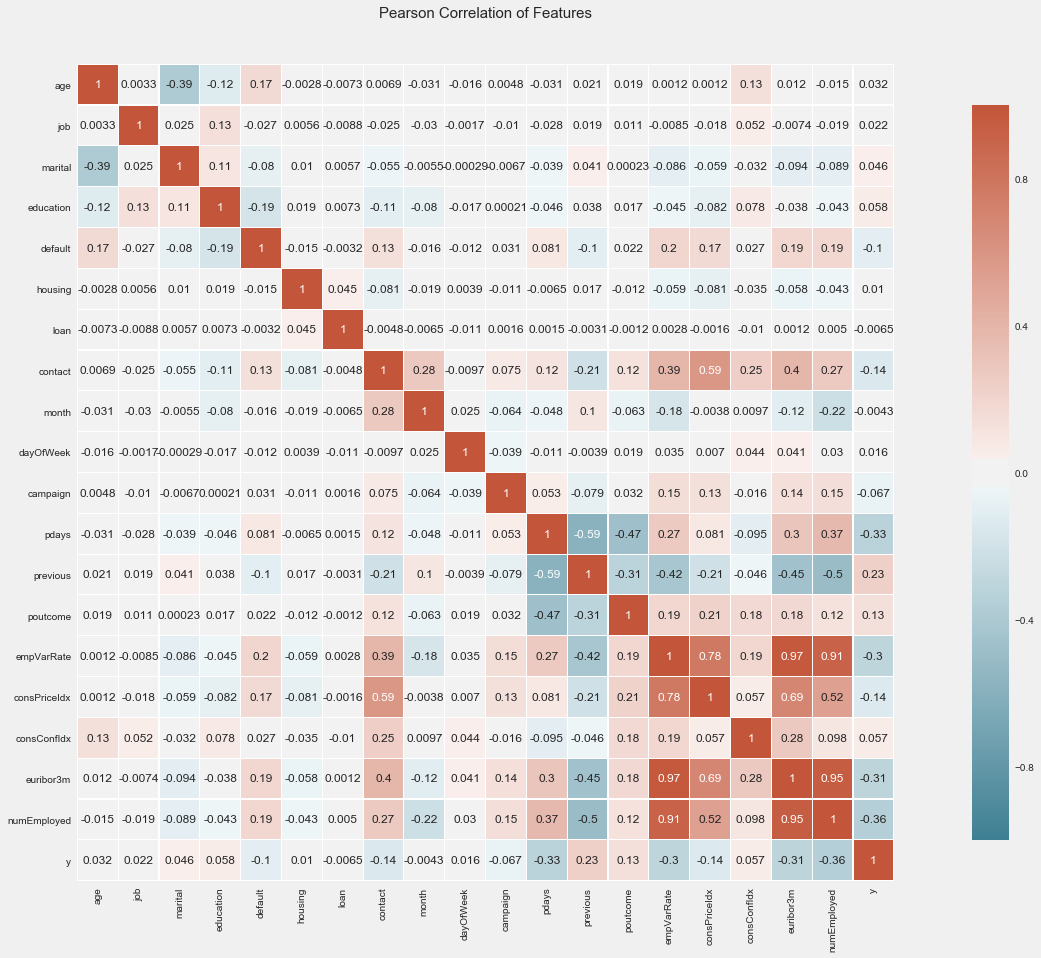

In [47]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(25, 14))
    colormap = sns.diverging_palette(220, 20, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df.drop('duration', axis=1)) # We drop 'duration'
plt.show()

### Even though correlation could give an indication of causality, it is not necessarily so! 
>### Hence, I proceed further to look up for further information that would enable us know whether we've obtained a good overview of the key causal variables.

<font color='black' size=4>With the help of Amos Oppong (Guru in Energy, Economics, Business), we assessed a number of techniques, including regression and decision trees, to determine the key causal variables to the success rate of clients’ signing onto a term deposit. In the regression case and per the explorations presented in Section A, a response labeled as “unknown” could perturb the expected outcomes. There are no extra clues in the dataset on how to assign the unknown responses and missing values and efforts such as using the mode or mean to fit them might equally be problematic; thus, we delete all such responses with their corresponding respondents. We estimate the potential key determinants by running a multiple linear regression using ordinary least squares on the ‘unknown-free’ dataset and the results are depicted in chart below.</font>

<img src="https://wertyworld.com/dc/1.png" alt="Picture 1 - Potential Key Determinants with Multiple Linear Regression" title="Potential Key Determinants" />

<font color='black' size=4>The results show that loan on housing (HOUS), the last month the client was contacted prior to this survey (MTH) and Euribor 3-month rate (EUR3) are statistically insignificant in determining whether or not a client might sign up for a term deposit or not. All the independent variable jointly explains ~33% of the variation in the success rate of clients’ signage (i.e., R-squared of ~0.331) as such overall effect is statistically significant at 1% [i.e., P-value(F) of ~0.00]. 
Due to the nature of techniques and methods used in the data collection process, the could be the problem of non-constant variance (heteroscedasticity) and we adopt the White’s, and Bruesch-Pagan test[21].

<br>
<br>
The results are presented below:
</font>

<pre><font>
OLS, using observations 1-25678
Dependent variable: uhat^2
Omitted due to exact collinearity: X2_X6 X3_X6 X4_X6 X5_X6 sq_DEFT X6_X7
 X6_X8 X6_X9 X6_X10 X6_X11 X6_X12 X6_X13 X6_X14 X6_X15 X6_X16 X6_X17 X6_X18
 X6_X19 X6_X20 X6_X21 sq_HOUS sq_LOAN sq_CONT

               coefficient       std. error     t-ratio    p-value 
  ---------------------------------------------------------------
  const          13091.3          2797.86       4.679    2.90e-06 ***
  AGE            0.0524022       0.0717112      0.7307   0.4649  
  JOB            0.148168        0.260509       0.5688   0.5695  
  MARRY          0.785505        0.838342       0.9370   0.3488  
  EDU            0.0729525       0.498753       0.1463   0.8837  
  DEFT           0.0235016       0.134107       0.1752   0.8609  
  HOUS           1.89305         1.39154        1.360    0.1737  
  LOAN           0.512596        0.954346       0.5371   0.5912  
  CONT           6.87323         4.80939        1.429    0.1530  
  MTH            8.25034         2.13905        3.857    0.0001   ***
  DWEEK          0.342743        0.502914       0.6815   0.4956  
  DURA           0.0157745       0.00268466     5.876    4.26e-09 ***
  CAMPN         −0.339605        0.260062      −1.306    0.1916  
  PDAYS          1.10588         0.955255       1.158    0.2470  
  PREVS         −3.23182         3.11283       −1.038    0.2992  
  PTCOME         1.03191         3.81683        0.2704   0.7869  
  EMPR          35.3354         16.9859         2.080    0.0375   **
  CPI         −154.017          33.1076        −4.652    3.30e-06 ***
  CCFI          −6.97830         0.777856      −8.971    3.13e-19 ***
  EUR3         110.372          19.7543         5.587    2.33e-08 ***
  NREMP         −2.42615         0.524968      −4.622    3.83e-06 ***
  sq_AGE         2.76919e-05     7.30489e-06    3.791    0.0002   ***
  X2_X3         −2.98037e-06     3.53266e-05   −0.08437  0.9328  
  X2_X4          7.44344e-05     0.000124539    0.5977   0.5501  
  X2_X5         −9.30405e-05     6.10686e-05   −1.524    0.1276  
  X2_X7          0.000339279     0.000180743    1.877    0.0605   *
  X2_X8          2.87527e-05     0.000124497    0.2310   0.8174  
  X2_X9         −0.000545737     0.000280570   −1.945    0.0518   *
  X2_X10         3.42375e-05     5.67152e-05    0.6037   0.5461  
  X2_X11         4.12601e-05     6.45069e-05    0.6396   0.5224  
  X2_X12        −1.79502e-06     3.47478e-07   −5.166    2.41e-07 ***
  X2_X13         2.99520e-05     3.61934e-05    0.8276   0.4079  
  X2_X14         5.19023e-05     7.61621e-05    0.6815   0.4956  
  X2_X15        −0.000886435     0.000212062   −4.180    2.92e-05 ***
  X2_X16        −0.000733437     0.000268167   −2.735    0.0062   ***
  X2_X17         0.000172131     0.000368537    0.4671   0.6405  
  X2_X18        −0.000130827     0.000467314   −0.2800   0.7795  
  X2_X19         4.68119e-06     2.72545e-05    0.1718   0.8636  
  X2_X20         0.000175789     0.000456744    0.3849   0.7003  
  X2_X21        −8.04573e-06     6.97279e-06   −1.154    0.2486  
  sq_JOB         0.000179832     9.51520e-05    1.890    0.0588   *
  X3_X4          0.000308768     0.000399170    0.7735   0.4392  
  X3_X5          0.000333691     0.000246434    1.354    0.1757  
  X3_X7          0.000394097     0.000662020    0.5953   0.5517  
  X3_X8         −0.000266097     0.000448761   −0.5930   0.5532  
  X3_X9          0.00116157      0.000998981    1.163    0.2449  
  X3_X10        −0.000203967     0.000206214   −0.9891   0.3226  
  X3_X11        −1.23001e-05     0.000236791   −0.05194  0.9586  
  X3_X12         5.12983e-06     1.21835e-06    4.210    2.56e-05 ***
  X3_X13         6.74819e-06     0.000124284    0.05430  0.9567  
  X3_X14        −5.36591e-05     0.000278957   −0.1924   0.8475  
  X3_X15         0.000696419     0.000796355    0.8745   0.3818  
  X3_X16         0.000168153     0.00100606     0.1671   0.8673  
  X3_X17         0.00243195      0.00130448     1.864    0.0623   *
  X3_X18        −0.00150278      0.00168500    −0.8919   0.3725  
  X3_X19         0.000155855     0.000105258    1.481    0.1387  
  X3_X20        −0.00174774      0.00170489    −1.025    0.3053  
  X3_X21        −3.36395e-07     2.56843e-05   −0.01310  0.9896  
  sq_MARRY       0.00106667      0.00287004     0.3717   0.7102  
  X4_X5          0.000218186     0.000790478    0.2760   0.7825  
  X4_X7         −0.000881761     0.00203984    −0.4323   0.6655  
  X4_X8         −0.00165133      0.00139485    −1.184    0.2365  
  X4_X9          0.00447361      0.00330511     1.354    0.1759  
  X4_X10         0.00133303      0.000685864    1.944    0.0520   *
  X4_X11         0.00105985      0.000725225    1.461    0.1439  
  X4_X12        −4.20106e-06     3.90859e-06   −1.075    0.2825  
  X4_X13        −0.000102511     0.000394948   −0.2596   0.7952  
  X4_X14        −0.00243019      0.00104871    −2.317    0.0205   **
  X4_X15         0.00959965      0.00310031     3.096    0.0020   ***
  X4_X16         0.00618286      0.00370110     1.671    0.0948   *
  X4_X17        −0.00268698      0.00423701    −0.6342   0.5260  
  X4_X18        −0.00759614      0.00538952    −1.409    0.1587  
  X4_X19        −0.000540917     0.000361989   −1.494    0.1351  
  X4_X20         0.00654833      0.00548775     1.193    0.2328  
  X4_X21        −2.87235e-05     8.50519e-05   −0.3377   0.7356  
  sq_EDU        −3.98912e-05     0.000413844   −0.09639  0.9232  
  X5_X7         −0.00130012      0.00124733    −1.042    0.2973  
  X5_X8         −0.000487322     0.000865123   −0.5633   0.5732  
  X5_X9         −0.00485147      0.00202336    −2.398    0.0165   **
  X5_X10         0.00120828      0.000410080    2.946    0.0032   ***
  X5_X11         0.000321442     0.000451334    0.7122   0.4763  
  X5_X12        −5.94601e-06     2.35771e-06   −2.522    0.0117   **
  X5_X13         0.000106761     0.000228276    0.4677   0.6400  
  X5_X14        −0.000834791     0.000665170   −1.255    0.2095  
  X5_X15        −0.00257476      0.00188152    −1.368    0.1712  
  X5_X16        −0.00128664      0.00223339    −0.5761   0.5646  
  X5_X17        −0.00218339      0.00273074    −0.7996   0.4240  
  X5_X18         0.00225333      0.00327288     0.6885   0.4912  
  X5_X19        −0.000411686     0.000218920   −1.881    0.0600   *
  X5_X20         0.00310751      0.00335651     0.9258   0.3546  
  X5_X21        −5.88428e-05     4.99065e-05   −1.179    0.2384  
  X7_X8         −0.000668104     0.00236631    −0.2823   0.7777  
  X7_X9          0.000213550     0.00559690     0.03816  0.9696  
  X7_X10        −0.000469922     0.00114171    −0.4116   0.6806  
  X7_X11        −0.000207369     0.00121468    −0.1707   0.8644  
  X7_X12         3.81328e-06     6.57825e-06    0.5797   0.5621  
  X7_X13         6.81944e-05     0.000629933    0.1083   0.9138  
  X7_X14        −0.00351897      0.00176131    −1.998    0.0457   **
  X7_X15         0.00506069      0.00500857     1.010    0.3123  
  X7_X16         0.00374517      0.00604926     0.6191   0.5358  
  X7_X17         0.00272473      0.00708227     0.3847   0.7004  
  X7_X18        −0.00967462      0.00899482    −1.076    0.2821  
  X7_X19        −0.000278522     0.000593595   −0.4692   0.6389  
  X7_X20         0.00686567      0.00915453     0.7500   0.4533  
  X7_X21        −0.000199630     0.000139627   −1.430    0.1528  
  X8_X9          0.00296325      0.00379668     0.7805   0.4351  
  X8_X10         0.000204803     0.000790404    0.2591   0.7956  
  X8_X11        −9.20774e-05     0.000827583   −0.1113   0.9114  
  X8_X12         1.71607e-05     4.20175e-06    4.084    4.44e-05 ***
  X8_X13         0.000503282     0.000446518    1.127    0.2597  
  X8_X14         0.00254957      0.00124470     2.048    0.0405   **
  X8_X15        −0.00405661      0.00350995    −1.156    0.2478  
  X8_X16        −0.00391729      0.00407803    −0.9606   0.3368  
  X8_X17        −0.00954583      0.00492340    −1.939    0.0525   *
  X8_X18        −0.00298537      0.00610327    −0.4891   0.6247  
  X8_X19        −0.000555299     0.000412796   −1.345    0.1786  
  X8_X20         0.0117341       0.00629176     1.865    0.0622   *
  X8_X21        −5.73094e-05     9.70935e-05   −0.5902   0.5550  
  X9_X10        −0.00552682      0.00314952    −1.755    0.0793   *
  X9_X11        −0.00453793      0.00203073    −2.235    0.0255   **
  X9_X12         0.000126096     1.06859e-05   11.80     4.71e-32 ***
  X9_X13        −0.000103643     0.00105350    −0.09838  0.9216  
  X9_X14         0.00443715      0.00329897     1.345    0.1786  
  X9_X15         0.0142078       0.00914107     1.554    0.1201  
  X9_X16         0.00620414      0.0114725      0.5408   0.5887  
  X9_X17         0.0301696       0.0147040      2.052    0.0402   **
  X9_X18        −0.0604205       0.0281076     −2.150    0.0316   **
  X9_X19        −0.00258819      0.00124397    −2.081    0.0375   **
  X9_X20         0.00519835      0.0276030      0.1883   0.8506  
  X9_X21        −0.000253765     0.000476981   −0.5320   0.5947  
  sq_MTH         0.0168720       0.00123502    13.66     2.44e-42 ***
  X10_X11        0.00259346      0.000414454    6.258    3.97e-10 ***
  X10_X12       −2.37168e-05     2.15459e-06  −11.01     4.07e-28 ***
  X10_X13        0.000251789     0.000315939    0.7970   0.4255  
  X10_X14        3.88721e-05     0.000718139    0.05413  0.9568  
  X10_X15       −0.00853761      0.00221315    −3.858    0.0001   ***
  X10_X16       −0.000984321     0.00258170    −0.3813   0.7030  
  X10_X17       −0.100979        0.00985323   −10.25     1.34e-24 ***
  X10_X18       −0.0434413       0.0131842     −3.295    0.0010   ***
  X10_X19       −0.00606554      0.000635810   −9.540    1.55e-21 ***
  X10_X20        0.137727        0.0160024      8.607    7.95e-18 ***
  X10_X21       −0.000981588     0.000207375   −4.733    2.22e-06 ***
  sq_DWEEK       0.000887564     0.000510962    1.737    0.0824   *
  X11_X12       −9.44994e-06     2.35939e-06   −4.005    6.21e-05 ***
  X11_X13       −0.000150955     0.000238821   −0.6321   0.5273  
  X11_X14       −0.000847406     0.000639589   −1.325    0.1852  
  X11_X15        0.000694142     0.00186294     0.3726   0.7094  
  X11_X16       −0.00160511      0.00222745    −0.7206   0.4712  
  X11_X17       −0.00772903      0.00255800    −3.022    0.0025   ***
  X11_X18       −0.000261226     0.00325947    −0.08014  0.9361  
  X11_X19       −0.000628314     0.000219754   −2.859    0.0043   ***
  X11_X20        0.00988765      0.00329538     3.000    0.0027   ***
  X11_X21       −7.61484e-05     5.03070e-05   −1.514    0.1301  
  sq_DURA        2.11312e-08     3.54883e-09    5.954    2.64e-09 ***
  X12_X13       −6.12844e-06     1.43885e-06   −4.259    2.06e-05 ***
  X12_X14       −6.98765e-06     3.55664e-06   −1.965    0.0495   **
  X12_X15       −1.55895e-05     1.03191e-05   −1.511    0.1309  
  X12_X16       −2.56371e-05     1.25760e-05   −2.039    0.0415   **
  X12_X17        0.000128159     1.31159e-05    9.771    1.64e-22 ***
  X12_X18       −0.000179889     1.71664e-05  −10.48     1.21e-25 ***
  X12_X19       −7.14849e-06     1.17370e-06   −6.091    1.14e-09 ***
  X12_X20       −9.52828e-05     1.65659e-05   −5.752    8.93e-09 ***
  X12_X21        2.74106e-07     2.72296e-07    1.007    0.3141  
  sq_CAMPN      −4.92068e-05     3.42119e-05   −1.438    0.1504  
  X13_X14        0.000773256     0.000733810    1.054    0.2920  
  X13_X15        0.00304099      0.00203815     1.492    0.1357  
  X13_X16        0.000614910     0.00239394     0.2569   0.7973  
  X13_X17        0.00458593      0.00204844     2.239    0.0252   **
  X13_X18        0.00126781      0.00167430     0.7572   0.4489  
  X13_X19        0.000286854     0.000157282    1.824    0.0682   *
  X13_X20       −0.00496803      0.00210311    −2.362    0.0182   **
  X13_X21        4.76344e-05     3.07218e-05    1.551    0.1210  
  sq_PDAYS      −0.000209856     0.000192663   −1.089    0.2761  
  X14_X15       −0.00192408      0.00152672    −1.260    0.2076  
  X14_X16       −0.00308140      0.00132655    −2.323    0.0202   **
  X14_X17        0.00589181      0.00351833     1.675    0.0940   *
  X14_X18       −0.00651913      0.00564678    −1.154    0.2483  
  X14_X19        0.000205917     0.000288019    0.7149   0.4747  
  X14_X20        0.00391464      0.00740974     0.5283   0.5973  
  X14_X21       −9.25568e-05     9.67069e-05   −0.9571   0.3385  
  sq_PREVS       0.0148855       0.00296137     5.027    5.03e-07 ***
  X15_X16        0.00289600      0.00525208     0.5514   0.5814  
  X15_X17        0.0211629       0.0102071      2.073    0.0381   **
  X15_X18       −0.00872705      0.0184696     −0.4725   0.6366  
  X15_X19       −0.00230261      0.000892568   −2.580    0.0099   ***
  X15_X20       −0.0643587       0.0214924     −2.994    0.0028   ***
  X15_X21        0.000809219     0.000311654    2.597    0.0094   ***
  sq_PTCOME      0.0319641       0.0152497      2.096    0.0361   **
  X16_X17        0.00590696      0.0122022      0.4841   0.6283  
  X16_X18       −0.0304962       0.0229166     −1.331    0.1833  
  X16_X19       −0.00386554      0.00110430    −3.500    0.0005   ***
  X16_X20       −0.0283943       0.0239496     −1.186    0.2358  
  X16_X21        0.000335216     0.000370881    0.9038   0.3661  
  sq_EMPR        0.200192        0.0293751      6.815    9.63e-12 ***
  X17_X18       −0.484620        0.118074      −4.104    4.07e-05 ***
  X17_X19       −0.0395109       0.00637622    −6.197    5.86e-10 ***
  X17_X20       −0.477567        0.0820442     −5.821    5.93e-09 ***
  X17_X21        0.00200592      0.00140873     1.424    0.1545  
  sq_CPI         0.529839        0.104223       5.084    3.73e-07 ***
  X18_X19        0.0385680       0.00475789     8.106    5.46e-16 ***
  X18_X20       −0.380653        0.116083      −3.279    0.0010   ***
  X18_X21        0.0112509       0.00287509     3.913    9.13e-05 ***
  sq_CCFI       −0.00144892      0.000292302   −4.957    7.21e-07 ***
  X19_X20       −0.0146381       0.00417356    −3.507    0.0005   ***
  X19_X21        0.000650043     7.38133e-05    8.807    1.37e-18 ***
  sq_EUR3        0.671699        0.0551535     12.18     5.02e-34 ***
  X20_X21       −0.0156489       0.00206585    −7.575    3.71e-14 ***
  sq_NREMP       0.000141991     2.78829e-05    5.092    3.56e-07 ***

Warning: data matrix close to singularity!

  Unadjusted R-squared = 0.374620

Test statistic: TR^2 = 9619.487103,
with p-value = P(Chi-square(207) > 9619.487103) = 0.000000 
</font><pre>

### Also ... a test for heteroskedasticity

<img src="https://wertyworld.com/dc/2.png" alt="Picture 2 - Bruesch-Pagan heteroscedasticity" title="Potential Key Determinants" />

***
<font color='black' size=4>
Results from both the White’s, and Bruesch-Pagan tests show that there exists the problem of heteroscedasticity. To help solve the violation of constant variance assumption, we adopt the heteroscedasticity-corrected model and the results are displayed below:
</font>

<img src="https://wertyworld.com/dc/3.png" alt="Picture 3 - Heteroscedasticity - corrected" title="Potential Key Determinants" />

***
<font color='black' size=4>
Results from the heteroscedasticity-corrected model show an increase in R-squared and in number statistically significant variables. It is also possible that some of the independent variables are dependent and we use the variance inflation factor (VIF) to check for collinearity.  
</font>

<img src="https://wertyworld.com/dc/4.png" alt="Picture 4 - Variation Inflation factors- corrected" title="Potential Key Determinants" />

***
<font color='black' size=4>
Results from the collinearity diagnostics show that employment variation rate (EMPR), Euribor 3-month rate (EUR3), and number of employees (NREMP) all register VIFs of more than 10. Thus, EMPR, EUR3 and NREMP are dropped and a final heteroscedasticity-corrected and multicollinearity-consistent model is adopted. Results from the heteroscedasticity-corrected and multicollinearity-consistent model are presented below:  
</font>

<img src="https://wertyworld.com/dc/5.png" alt="Picture 5 - Heteroscedasticity - corrected 2" title="Potential Key Determinants" />

***
<font color='black' size=4>
Results from the heteroscedasticity-corrected and multicollinearity-consistent model shows a high R-squared and that the joint effects of all the independent variables used in the estimation accounts for a little over 96% of the variation in sign-up responses.  </font>

### Finally, a pair plot 
>### Note: We need confirmations of the key causal variables. I will recommend you to use a high-end PC to generate the pair plot, lest your kernel might stop or might take a long time to generate the plot. The pair plot would be generated for the entire dataset.

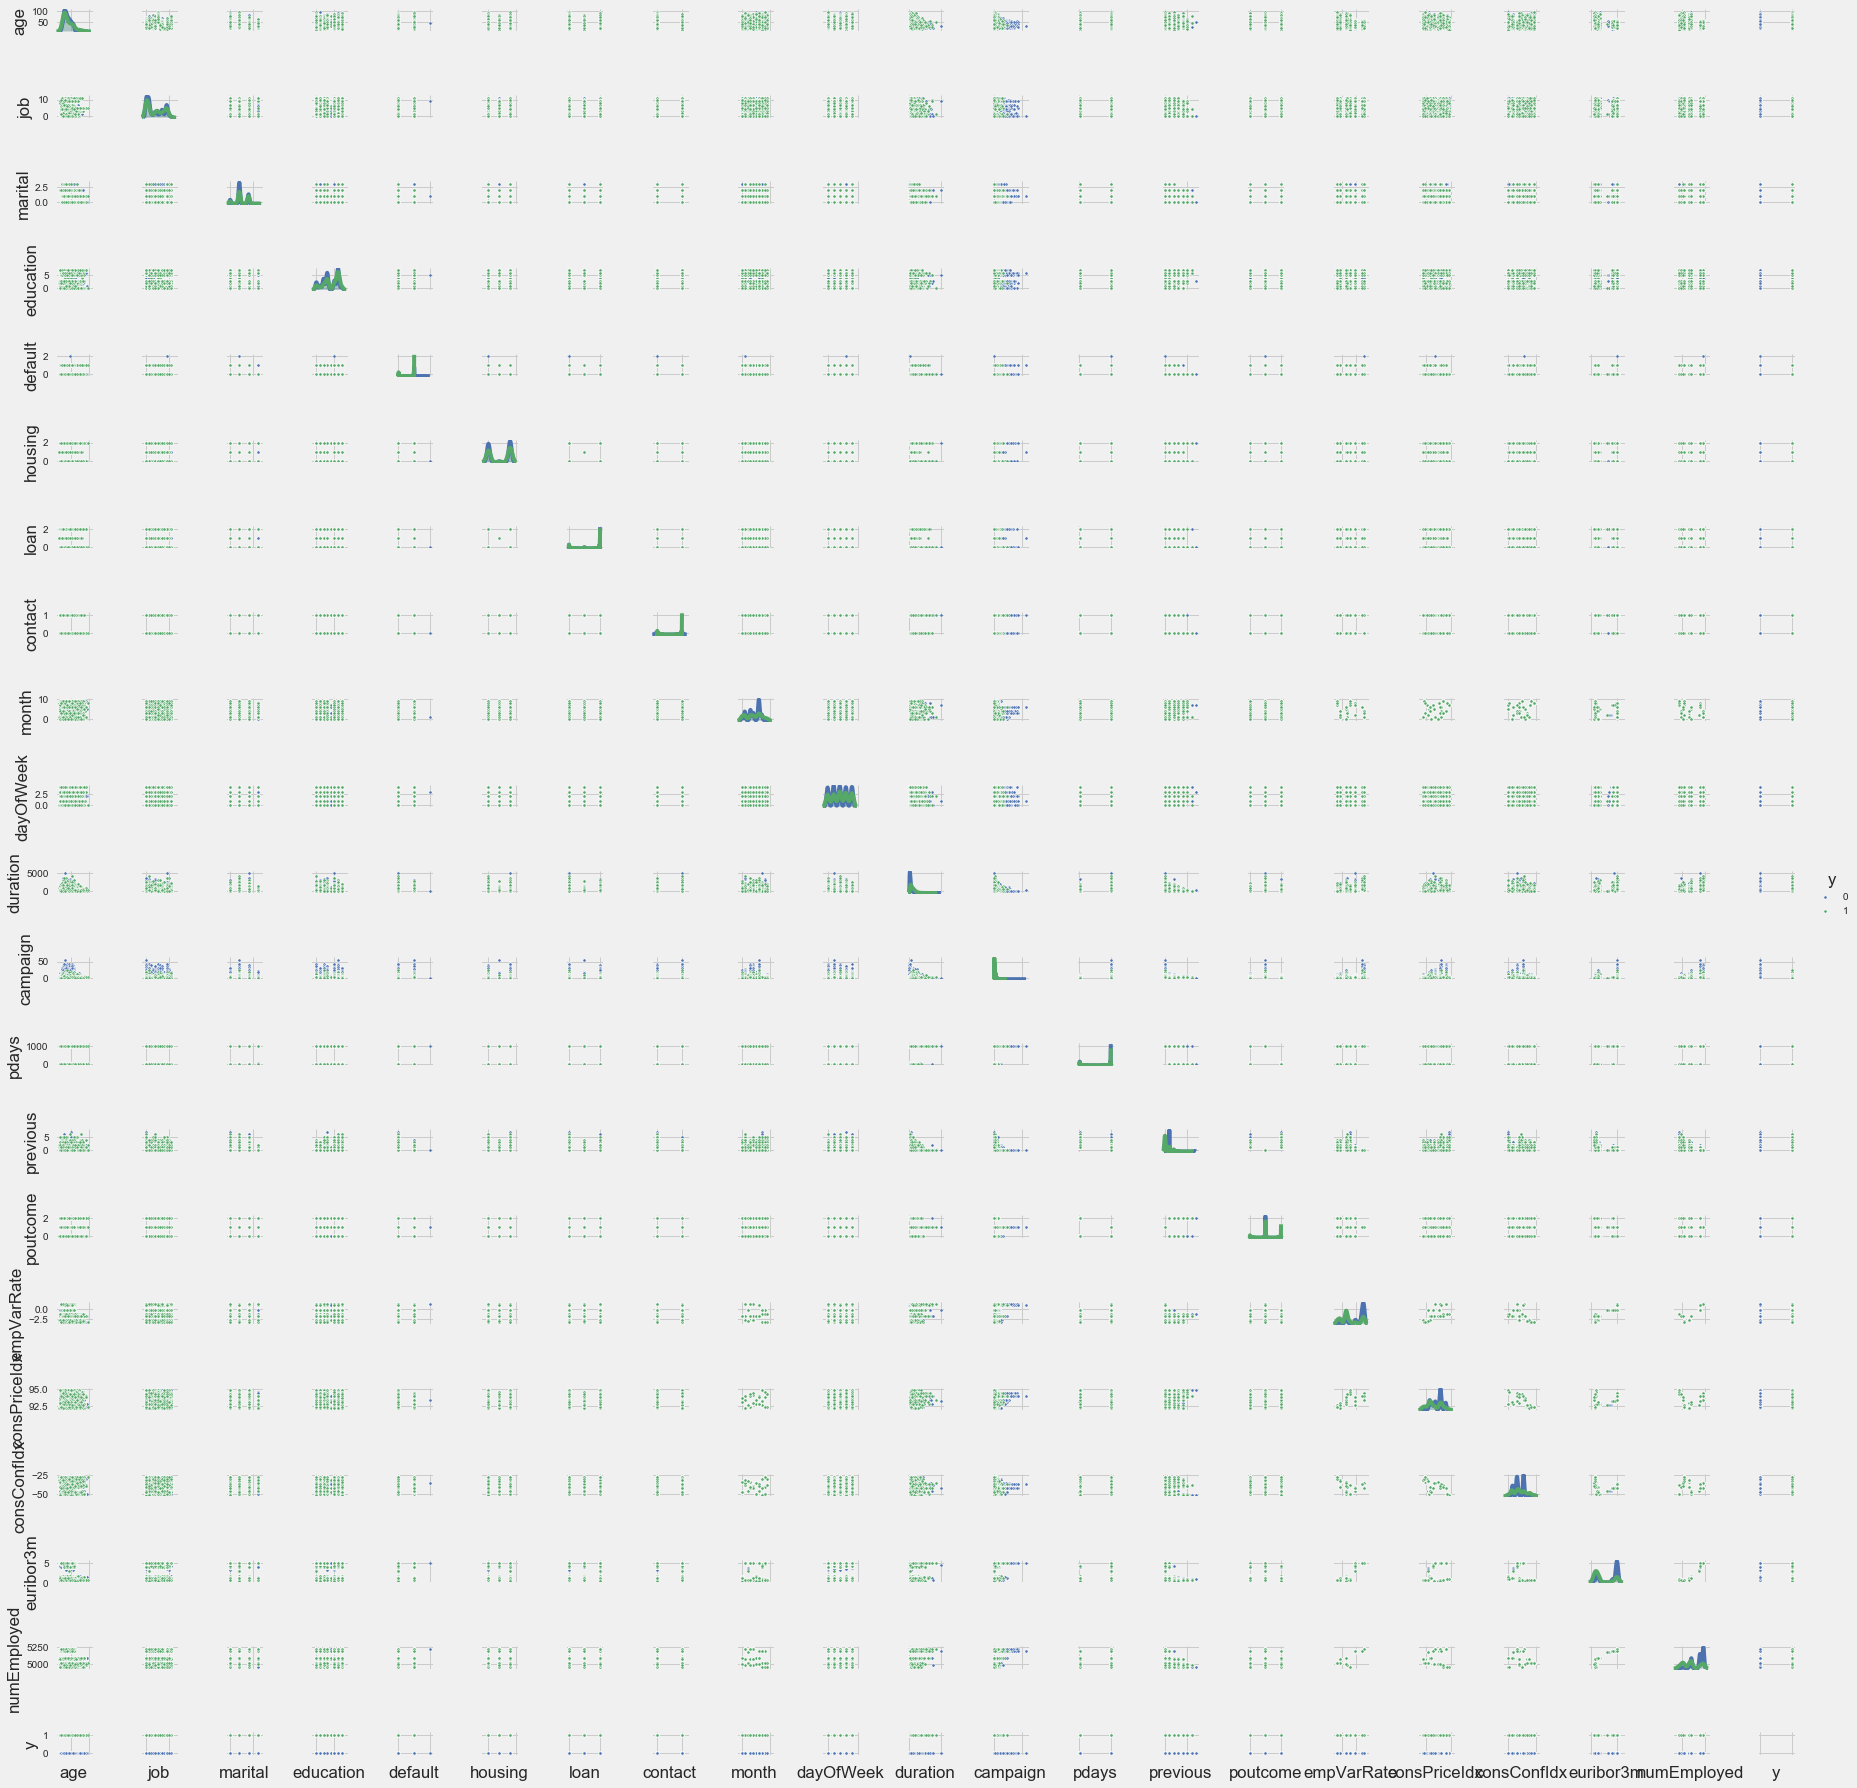

In [50]:
# We then compute the pair plots of entire dataset
pp = sns.pairplot(df, hue = 'y', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

#from pandas.plotting import scatter_matrix
#scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

### Great! This is better. Such an lucid view. Let's rock on!
>#### Let's view the head of our data again on order to ensure we aren't lost after a deep dive into the above real-life analyses

In [51]:
df.head() # Just viewing data

,age,job,marital,education,default,housing,loan,contact,month,dayOfWeek,...,campaign,pdays,previous,poutcome,empVarRate,consPriceIdx,consConfIdx,euribor3m,numEmployed,y
0,26,0,2,6,0,0,0,1,1,1,...,1,3,1,2,-1.7,94.027000,-38.299999,0.904,4991.600098,1
1,35,1,1,7,0,2,0,0,6,2,...,3,999,0,1,-1.8,92.892998,-46.200001,1.327,5099.100098,1
2,42,6,1,6,0,2,0,0,0,3,...,1,999,1,0,-1.8,93.074997,-47.099998,1.423,5099.100098,1
3,46,3,1,3,0,2,0,0,1,0,...,1,999,0,1,-2.9,92.200996,-31.400000,0.881,5076.200195,1
4,41,7,2,3,0,2,2,0,0,4,...,2,999,0,1,-1.8,93.074997,-47.099998,1.415,5099.100098,1


### We've come to the end of an inspiring breakdown of a real business intelligence dive. 
>#### Let's proceed to the next notebook to Create some models.